In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/score-data/Score_data.xlsx


# Prediction using Supervised ML

# Prediction using linear regression model

## By : Deeksha Sharma

In [32]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
import warnings
warnings.filterwarnings('ignore')

In [33]:
data=pd.read_excel('/kaggle/input/score-data/Score_data.xlsx')
data

,Hours,Score
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Score   25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
data_train,data_test = train_test_split( data, test_size=0.3, random_state=42)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [38]:
y_train=data_train.pop('Score')
X_train=data_train

In [39]:
import statsmodels.api as sm

In [40]:
X_train_lm = sm.add_constant(X_train)

In [41]:
lm1 = sm.OLS(y_train,X_train_lm).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     308.6
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           2.05e-11
Time:                        06:13:21   Log-Likelihood:                -53.419
No. Observations:                  17   AIC:                             110.8
Df Residuals:                      15   BIC:                             112.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7942      3.209      0.871      0.3

In [42]:
lm1.params

const    2.794197
Hours    9.710541
dtype: float64

In [43]:
y_train_pred=lm1.predict(X_train_lm)

In [44]:
res=y_train-y_train_pred

<AxesSubplot:ylabel='Density'>

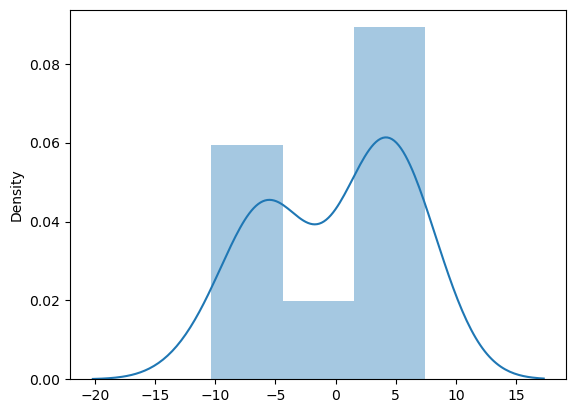

In [45]:
sns.distplot(res)

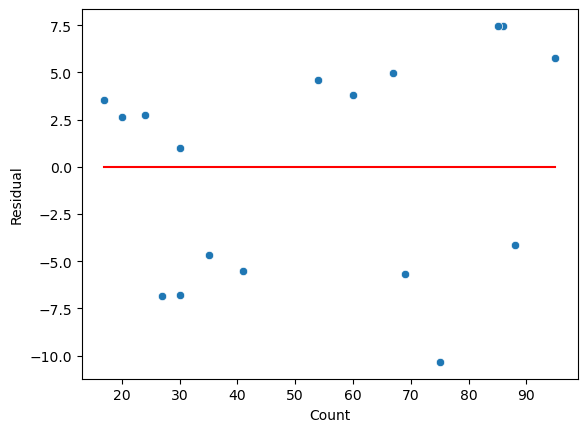

In [46]:
res = y_train - y_train_pred
sns.scatterplot(x=y_train, y=res)
sns.lineplot(x=y_train, y=(y_train - y_train), color='red')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()


In [47]:
y_test=data_test.pop('Score')
X_test=data_test

In [48]:
X_test_lm=sm.add_constant(X_test)

In [49]:
y_test_pred=lm1.predict(X_test_lm)

In [50]:
y_test_pred

8     83.391686
16    27.070549
0     27.070549
23    69.796929
11    60.086388
9     29.012657
13    34.838982
1     52.317955
dtype: float64

In [51]:
res=y_test-y_test_pred

<AxesSubplot:ylabel='Density'>

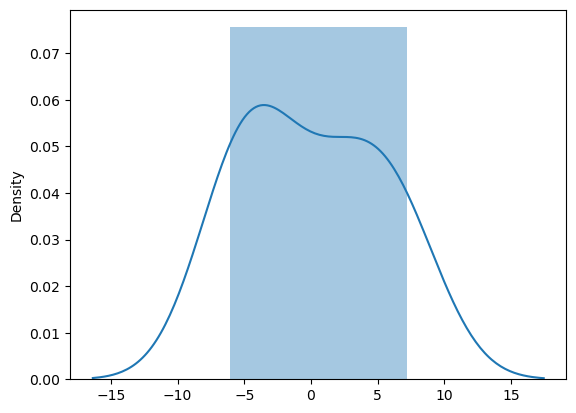

In [52]:
sns.distplot(res)

In [53]:
from sklearn.metrics import r2_score

In [54]:
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9536486503889445
0.9487647340257012


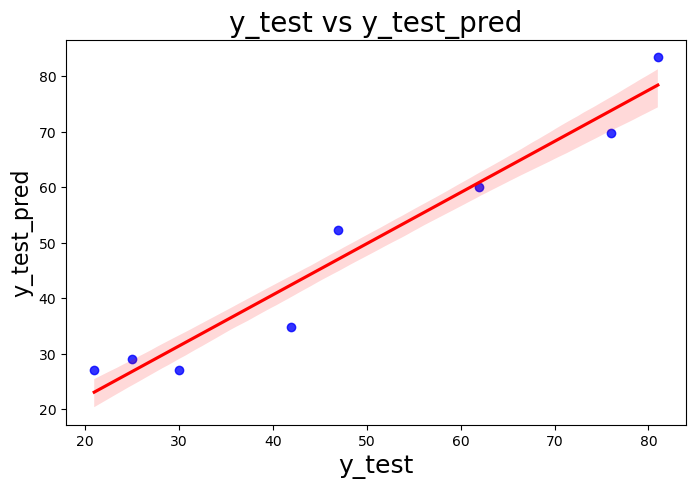

In [55]:
plt.figure(figsize=(8,5))
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_test_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                        
plt.ylabel('y_test_pred', fontsize=16)                        
plt.show()


In [56]:
X_test = np.array([1, 9.5])  
y_pred=lm1.predict(X_test.reshape(1,-1))[0]
y_pred

95.04433557250368